# Support Vector Machine
I have finally reached a point in the project where models can be trained using the data pipeline I've created. To start, I am using a support vector machine algorithm. It is known for doing exceptionally well in binary classification and when the feature to sample ratio of the data is relatively high.

I dropped many (possibly useful) columns when processing the data because not all recording use the same channels, this leads to major discrepancies. I think if performance is horrendously abysmal bringing those columns back in elegantly will be a priority. 

It took a while to get to this point, so I want to shout out some of the things I learned/did to get here: spectral entropy, PSD, low pass filtering, time-series data segmentation, band power, tons of data extraction/analysis/preprocessing, time/frequency domain feature extraction, data labeling

### Goals 
- refresh myself on the basic ML train, test, analyze workflow
- gain insight on the performance of an SVM using the data, do some hyperparameter tuning

### Results
- On my first try, I got hilariously optimistic results. My test accuracy was `96.46%`, which seemed a bit too promising right off the bat. Since going off accuracy alone is not helpful, I plotted the confusion matrix. It turns out my first SVM model ended up predicting all 0's (inter-ictal) state. This gave the illusion of an accurate model, but it just turns out the class imbalance is just too high. I'll have to rely more on confusion matrices, and other model metrics besides accuracy (this is true for any model though). Also I will probably have to manually find the best values for the class weights as setting `class_weights=balanced` might not have set enough weight for an ictal state.

### Notes


In [1]:
import importlib
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

import seaborn as sns
from matplotlib import pyplot as plt

import extraction
from extraction.LT import LTPipeline
importlib.reload(extraction.LT) # bc I keep updating LTPipeine, this ensures the ipynb cache updates
from extraction.tools import get_all_edf_files_for_patient

In [2]:
# pipeline
files = get_all_edf_files_for_patient('chb01')
files.extend(get_all_edf_files_for_patient('chb02'))
# files.extend(get_all_edf_files_for_patient('chb03'))
files.extend(['chb15_06.edf'])   # manually add one file that will be validation data

# print(files)
pipeline = LTPipeline(files)  

# TODO: processing multiple files in parallel doesn't seem to help like I think it would... I might have to do some timing on this
X_train, X_test, y_train, y_test = pipeline.train_test_split(validation_patient_id='chb15')


2025-07-03 23:27:43,251 - INFO - 79 total file(s) in pipeline!


In [3]:
# define
model = SVC(
    C=1.0,
    tol=0.01,
    kernel="rbf",
    class_weight={0: 0.01, 1: 0.99},
    random_state=27
)
'''
C - Regularization parameter. The strength of the regularization is inversely proportional to C.
tol - Tolerance for stopping criterion.
class_weight - The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
in the input data. i.e. higher frequency classes have lower weights (for calculating loss), and vice versa
'''

# train
model.fit(X_train, y_train)

KeyboardInterrupt: 

### Model Evaluation

In [7]:
# model accuracy results
y_pred_train = model.predict(X_train)
acc = accuracy_score(y_train, y_pred_train, normalize=True)
print(f'Accuracy for the train data is {acc*100:.2f}%')

y_pred_test = model.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
print(f'Accuracy for the test data is {acc*100:.2f}%')

Accuracy for the train data is 100.00%
Accuracy for the test data is 96.46%


In [10]:
# precision, recall
'''
precision is intuitively the ability of the classifier NOT to label as positive a sample that is negative. best = 1, worst = 0
recall is intuitively the ability of the classifier to find all the positive samples. best = 1, worst = 0
'''

# TODO: use classification report

AttributeError: This 'SVC' has no attribute 'predict_proba'

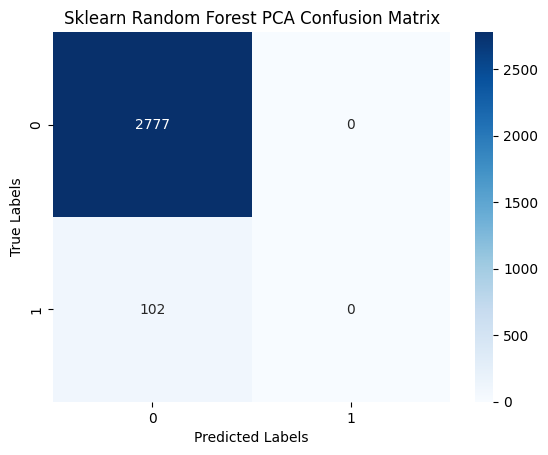

In [9]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Sklearn Random Forest PCA Confusion Matrix")
plt.show()